### As the first portfolio project, we would focus on the workflow structure of predictive analysis

#### Highlights of this project:
0. **Structured** problem solving
1. **DETAILS on background thought process** start to finish
2. Data preparation
3. Methods of performance evaluation
4. Methods of performance comparison and improvements

#### Citation:
The dataset is from Kaggle - Hotel booking demand

url: https://www.kaggle.com/jessemostipak/hotel-booking-demand/metadata


Original Sources: Hotel Booking Demand Datasets: Nuno Antonio, Ana Almeida, Luis Nunes, Data in Brief, 2019

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the data
hotel = pd.read_csv('Data/hotel_bookings.csv')
pd.set_option('display.max_columns', None)

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Let's determine our GOAL first: our goal is trying to predict whether the booking is for a resort hotel or a city hotel given the other data for the same booking. I chose this goal because I am expecting to find differences in booking patterns for the two different hotels, and hopefully those patterns are distinctive enough to separate types of hotels booked.

In [3]:
#Let's take a look at column infos
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

#### Here, I would like to drop some columns that we are not going to use in this analysis. The columns dropped have perceived low usuability - for example, the columns contain a lot of Null values. For another example, considering the time series data, eventhough we might be able to perform some trend analysis on those data, given a new datetime that is not in this dataset, it is hard for some classification models to predict the outcomes.

In [4]:
#Drop Columns
hotel.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 
           'company', 'reservation_status_date'], axis = 1, inplace = True)

#### Before we move on, let's do one more thing to find out how many unique values for each column

In [5]:
hotel.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status       

#### If we focus just on the categorical variables, we found that columns "country" and "agent" have lots of categories. So I decide to remove them from our analysis for the following reasons:
1. Simplicity: if we were to one-hot encode those categorical variables, we would end up with hundreds of features, which might be okay for production use but it would add complexity to this demonstration
2. Feature Balance: take "country" as an example - if one country only have few matching booking records, then the predictive power of models on that country might be limited

In [6]:
hotel.drop(['country', 'agent'], axis = 1, inplace = True)

In [7]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
reserved_room_type                119390 non-null object
assigned_room_type                119390 n

#### Next, it seems "children" column has 4 NA values, we can easily fill with its mean here

In [8]:
hotel.fillna({'children': np.mean(hotel['children'])}, inplace = True)

In [9]:
#Check if there are NA values in the entire dataframe
hotel.isna().any().any()

False

#### The following is added proactively based on later logic - there are some features which contain categories that have too few instances that could impact data tranformation. Here we would choose to delete instances with those categories since we have enough instances to work with. (Otherwise, we might do something like reassign majority labels for those instances)

In [10]:
print(hotel['reserved_room_type'].value_counts())
print(hotel['assigned_room_type'].value_counts())
hotel.drop(hotel['reserved_room_type'].isin(['P', 'L']).to_numpy().nonzero()[0], inplace = True)
hotel.reset_index(drop = True, inplace = True)
hotel.drop(hotel['assigned_room_type'].isin(['P', 'L']).to_numpy().nonzero()[0], inplace = True)
hotel.reset_index(drop = True, inplace = True)
print('\n \n After Drop - \n \n')
print(hotel['reserved_room_type'].value_counts())
print(hotel['assigned_room_type'].value_counts())

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

 
 After Drop - 
 

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
Name: reserved_room_type, dtype: int64
A    74052
D    25322
E     7806
F     3750
G     2553
C     2374
B     2162
H      711
I      363
K      279
Name: assigned_room_type, dtype: int64


In [11]:
print(hotel['market_segment'].value_counts())
hotel.drop(hotel['market_segment'].isin(['Undefined']).to_numpy().nonzero()[0], inplace = True)
hotel.reset_index(drop = True, inplace = True)
print('\n \n After Drop - \n \n')
print(hotel['market_segment'].value_counts())

print('\n \n')

print(hotel['distribution_channel'].value_counts())
hotel.drop(hotel['distribution_channel'].isin(['Undefined']).to_numpy().nonzero()[0], inplace = True)
hotel.reset_index(drop = True, inplace = True)
print('\n \n After Drop - \n \n')
print(hotel['distribution_channel'].value_counts())

Online TA        56475
Offline TA/TO    24217
Groups           19811
Direct           12600
Corporate         5294
Complementary      736
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

 
 After Drop - 
 

Online TA        56475
Offline TA/TO    24217
Groups           19811
Direct           12600
Corporate         5294
Complementary      736
Aviation           237
Name: market_segment, dtype: int64

 

TA/TO        97866
Direct       14638
Corporate     6670
GDS            193
Undefined        3
Name: distribution_channel, dtype: int64

 
 After Drop - 
 

TA/TO        97866
Direct       14638
Corporate     6670
GDS            193
Name: distribution_channel, dtype: int64


#### The general data cleaning phase is now complete, for the data ready to be used by models, we usually have two more steps to do:
1. One-hot encode non-ordinal categorical features
2. Standardize numerical features and features have large scale

#### As for the reason why we need to perform the transformations above:
1. One-hot encoding: We need one-hot encoding because we do not want our model to assume innate natural orders for non-ordinal categorical variables. Without one-hot encoding it could lead to poorer model performance as the model might "think" the order matters.
2. Standardization: Standardization could help with multiple things, for example, it could help gradient descent to converge faster. In addition, a lot of models that use distance between data points for training have to use standardized dataset because we do not want features with larger scale dominate the model training. There are other reasons as to why to standardize but the general rule of thumb is: when unsure, always standardize.

In [12]:
#Get all columns of the dataset
all_columns = hotel.columns.tolist()

#Define columns need one-hot encoding and columns need standardization
enc_cols = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 
            'customer_type', 'reservation_status']
std_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 
            'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
           'adr', 'required_car_parking_spaces', 'total_of_special_requests']
#Remaining columns that do not need transformation
rem_cols = ['is_canceled', 'is_repeated_guest']

In [13]:
#Next we get the indices of the columns need one-hot encoding and columns need standardization
enc_idx = np.isin(all_columns, enc_cols).nonzero()[0]
std_idx = np.isin(all_columns, std_cols).nonzero()[0]
#Remaining idx
rem_idx = np.isin(all_columns, rem_cols).nonzero()[0]
#Define index of the response variable
res_idx = [0] #hotel

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [15]:
#Here is a demonstration of how each encoder works
ohe = OneHotEncoder(drop = 'first', sparse = False)
print('One-Hot Encoder: \n', ohe.fit_transform(hotel.loc[:, ['meal']]))

le = LabelEncoder()
print('Label Encoder: \n', le.fit_transform(hotel['hotel']))

ss = StandardScaler()
print('Standard Scaler: \n', ss.fit_transform(hotel.loc[:, ['lead_time']]))

One-Hot Encoder: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
Label Encoder: 
 [1 1 1 ... 0 0 0]
Standard Scaler: 
 [[ 2.22685052]
 [ 5.92314745]
 [-0.90798359]
 ...
 [-0.65532532]
 [ 0.04650321]
 [ 0.94484373]]


#### But what we actually would like to do here is to create a pipeline of those transformers as well as the estimator for ease of use later, here is a snapshot of the pipleline we are going to build (here we only focus on the section in red):

<img src="Img/Portfolio 1 Pipeline Flow.png">

In [16]:
#Import necessary packages
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import make_pipeline, FeatureUnion

In [17]:
#FeatureSelector Class
class FeatureSelector(TransformerMixin, BaseEstimator):
    '''
    Select subset of features based on feature_idx
    '''
    def __init__(self, feature_idx):
        self.feature_idx = feature_idx
        
    def fit(self, X, y = None):
        return self
    
    def transform( self, X, y = None ):
        return X[:, self.feature_idx].reshape(-1, len(self.feature_idx)) #make sure to return 2d array

In [18]:
#Make CustomLabelEncoder so that fit_transform accepts 3 arguments instead of 2 for pipeline use
class CustomLabelEncoder(TransformerMixin, BaseEstimator):
    def __init__(self, *args, **kwargs):
        self.le = LabelEncoder(*args, **kwargs)
        
    def fit(self, X, y = None):
        self.le.fit(X.ravel()) #use .ravel() to return 1d array for LabelEncoder
        return self
    
    def transform(self, X, y = None):
        return self.le.transform(X.ravel())

In [19]:
enc_pipe = make_pipeline(FeatureSelector(enc_idx), OneHotEncoder(drop = 'first', sparse = False))
std_pipe = make_pipeline(FeatureSelector(std_idx), StandardScaler())
rem_pipe = FeatureSelector(rem_idx)

res_pipe = make_pipeline(FeatureSelector(res_idx), CustomLabelEncoder())

#Concatenate the pipelines using FeatureUnion
trans_pipe = FeatureUnion([('enc_pipe', enc_pipe), ('std_pipe', std_pipe), ('rem_pipe', rem_pipe)], n_jobs = -1)

#### One last thing, we would use numpy array instead of pandas dataframe from this time on, so we need to change hotel data to numpy array format

In [20]:
hotel_df = hotel.copy() #take a backup
hotel = np.asarray(hotel)

#### Now let's test if our pipelines (trans_pipe and res_pipe) are working properly

In [21]:
X = trans_pipe.fit_transform(hotel)
y = res_pipe.fit_transform(hotel)

In [22]:
print(f'The shape of the original dataset is {hotel.shape}; the shape of transformed X is {X.shape}; \
the shape of transformed y is {y.shape}')

The shape of the original dataset is (119367, 24); the shape of transformed X is (119367, 51); the shape of transformed y is (119367,)


#### Now all the data pre-processing is complete, we would like to train a simple model and make predictions on the types of hotel for individual bookings. After that, we would evaluate model performance and take actions to improve it.

#### First, we would like to split our dataset for training and testing, the spliting strategy is:
1. First split the entire dataset into train_all and test set
2. Further split train_all set into train and cv (cross-validation) set using Stratified K-Fold Cross-Validation

As a result, we would end up with train(k-fold), cv(k-fold) and test (holdout for final testing) sets.

The reason we would like to use cross-validation set for model evaluation is that we would like to see how well the model's generalized performance is while preventing the test set information from "leaking" into the model selection process. In addition, Stratified K-Fold CV makes the generalized performance evaluation more robust and give us more confidence on the model's true performance for unknown data.

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [24]:
#Here we would revert X back into its original state because for demonstration purpose,
#we would build the entire pipeline later containing both the transformers as well as the model so that we can fit on original X directly
X = np.asarray(hotel_df)

In [25]:
#Split the entire set into train_all and test set
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1, stratify = y) 
#We chose test_size 10% because we have 100k+ instances to work with so 10% of those instances are large enough for testing

In [26]:
#Split the train_all set into train and cv sets (actually indices) using Stratified K-Fold CV
skf = StratifiedKFold(n_splits = 10, random_state = 1)
train_cv_idx = skf.split(X_train_all, y_train_all)

#### Second, we select our model - we would start with a simple model first before we add complexity to model selection after we evaluate our results. Here, we would use Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(random_state = 1, solver = 'lbfgs') #We would leave other hyper-parameters as default since we would tune them later

#### Third, before we start training our model, we need to decide on our evaluation metrics here. The reason is that since we are using k-folds, essentially we would train the model k times and we would like to store the evaluation metric for each epoch/iteration through the process.

#### The most common evaluation metric is the accuracy score, however, accuracy score is reasonable only if we have balanced classes (for the response variable) - so here we would quickly check the class distribution.

In [29]:
class_distribution = hotel_df['hotel'].value_counts()

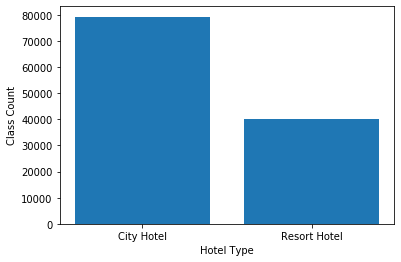

In [30]:
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Hotel Type')
plt.ylabel('Class Count')
plt.show()

#### From the graph above, obviously City Hotel has a lot more instances than the number of instances for the Resort Hotel in the dataset. As a result, we would like to select a metric other than accuracy score since the classes are unbalanced. One such common metric is the F1 score which is calculated based on precision and recall values. We would use F1 score here for our evaluation metric.

#### Now we would like to train our model

In [31]:
#Import F1 score metric
from sklearn.metrics import f1_score, accuracy_score

In [32]:
#First, we complete our entire pipeline
pipe_lr = make_pipeline(trans_pipe, lr)

#Then for each epoch from 1 to k, we train the model and store the evaluation score - F1 score
scores = []
scores_2 = []
#Just curious about the accuracy score
scores_acc = []

for train_idx, cv_idx in train_cv_idx:
    X_train = X_train_all[train_idx]
    X_cv = X_train_all[cv_idx]
    y_train = y_train_all[train_idx]
    y_cv = y_train_all[cv_idx]
    
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_cv)
    #Here we store two versions of F1 score with positive label = 1 and 0 respectively
    score = f1_score(y_cv, y_pred)
    score_2 = f1_score(y_cv, y_pred, pos_label = 0)
    
    scores.append(score)
    scores_2.append(score_2)
    
    score_acc = accuracy_score(y_cv, y_pred) 
    scores_acc.append(score_acc)

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

#### The logistic regression model might fail to converge after default 100 iterations. Anyway, now let's look at the result: we have two sets of F1 score based on which hotel we denote as "positive" label, to get a single result, we would just take the average of the combined sets of F1 scores as we are not particularly interested in predicting one type of hotel over another.

In [33]:
#we would just use scores to store both sets of F1 Score
scores += scores_2 #Note the + append list elements instead of adding them up

In [34]:
print(f'The average F1 Score is {round(np.mean(scores), 3)}.')

The average F1 Score is 0.805.


#### We know the average F1 score we get is a relatively high score since the F1 score is between 0 and 1 but it is hard to interpret it. So we would just check our accuracy score quickly just for better interpretation.

In [35]:
print(f'The average accuracy score is {round(np.mean(scores_acc), 3)}.') #How many instances we predicted correctly out of all instances

The average accuracy score is 0.835.


#### Again, accuracy score is not our evaluation metric, so it is hard for us to comment directly whether the accuracy score means good or bad performance of the model. However, we can use it to compare with a "baseline" accuracy score, which is generated by always predicting the majority class label.

In [36]:
#First, let's take a look at the class distribution for types of hotel for the entire dataset
vc = hotel_df['hotel'].value_counts()
print(vc)
print('\n')

#Here, we have more instances for City Hotel than Resort Hotel
print(f"The City Hotel percentage of the entire dataset is: {round(vc['City Hotel']/vc.sum(), 3)}.")
print('\n')

#Because we stratified by class proportion when we performed the train-test split, so the City Hotel percentage of the train_all set should stay the same
vc = np.unique(y_train_all, return_counts = True)[1]
pc = vc.max()/vc.sum()
print(f'The baseline accuracy score is {round(pc, 3)}.')

City Hotel      79316
Resort Hotel    40051
Name: hotel, dtype: int64


The City Hotel percentage of the entire dataset is: 0.664.


The baseline accuracy score is 0.664.


#### As a result, we know that the resulting accuracy score from our logistic regression model is at least better than the baseline we defined

#### One shortcut for scoring metrics is that instead of manually calculating score using StratifiedKFold, we could use cross_val_score from sklearn, which performs the stratified k-fold for you.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score)
cvs = cross_val_score(estimator = pipe_lr, X = X_train_all, y = y_train_all, scoring = scorer, cv = 10, n_jobs = -1)

In [38]:
print(cvs) #Note the F1 score we get here is only for positive label = 1

[0.7271603  0.73142332 0.7208589  0.71682797 0.72346326 0.72072907
 0.73378213 0.72595337 0.73653432 0.73948294]


#### Another way for evaluation is plotting the ROC (Receiver Operating Characteristic) curve and measuring the AUC (Area Under Curve), both are shown below for positive label = 1.

In [39]:
#We are still using StratifiedKFold cross-validation
y_cvs = []
y_probas = []
y_preds = []

train_cv_idx = skf.split(X_train_all, y_train_all)

for train_idx, cv_idx in train_cv_idx:
    X_train = X_train_all[train_idx]
    X_cv = X_train_all[cv_idx]
    y_train = y_train_all[train_idx]
    y_cv = y_train_all[cv_idx]
    
    pipe_lr.fit(X_train, y_train)
    y_proba = pipe_lr.predict_proba(X_cv) #Note that we are predicting probabilities here
    class_1_idx = pipe_lr.classes_.nonzero()[0][0]
    y_proba = y_proba[:, class_1_idx] #One sided probability: get the probability for class 1
    
    y_pred = pipe_lr.predict(X_cv)
    
    #Store y_cv and y_proba in y_cvs and y_probas
    y_cvs.append(y_cv)
    y_probas.append(y_proba)
    y_preds.append(y_pred)

C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Tony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

In [40]:
#Calculate metrics to draw the ROC curve
from sklearn.metrics import roc_curve, auc

fpr_ip = np.linspace(0, 1, 51)
tprs = []

for y_cv, y_proba in zip(y_cvs, y_probas):
    fpr, tpr, _ = roc_curve(y_cv, y_proba)
    tpr_ip = np.interp(fpr_ip, fpr, tpr) #linear interpolation
    tprs.append(tpr_ip)
    
#reset variables so that we do not end up with so many different variables
fpr = fpr_ip
tpr = np.mean(tprs, axis = 0) #Average over k-fold
#calculate AUC score
auc_score = auc(fpr, tpr)

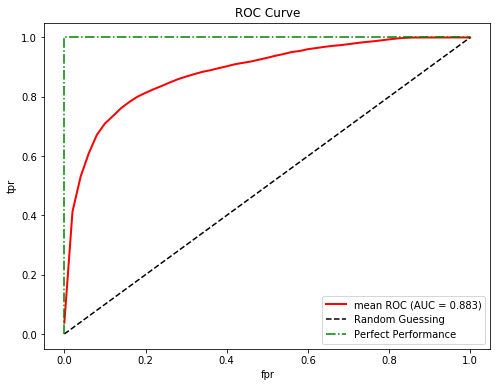

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(fpr, tpr, c = 'r', lw = 2, label = f'mean ROC (AUC = {round(auc_score, 3)})')
ax.plot([0, 1], [0, 1], '--', c = 'black', label = 'Random Guessing')
ax.plot([0, 0, 1], [0, 1, 1], '-.', c = 'g', label = 'Perfect Performance')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax.set_title('ROC Curve')
ax.legend()
plt.show()

The AUC score we got is good enough comparing with random guessing benchmark of AUC = 0.5, note again the evaluation above is based on positive label = 1

#### Before we move on, let's recap what we have done - we started from some simple data cleaning, then moving on to gradually building a pipeline including both the transformers and the model. After that, we run the pipeline for predictions and picked appropriate evaluation methods for evaluations. So far so good, but we still have not tried our best on the performance side...

#### So next, we would like to work on improving the predictive performance to get more accurate predictions. There are many ways that might help to improve performance depending on the situations. One thing always good to start with is to find out whether the model suffers high bias/variance or not, and one useful tool to accomplish that is the learning curve. Once we find out about the bias/variance of the current model, we would have a clearer idea on what methods to use to improve performance.

For better demonstration, from this point on we would only use the F1 score with positive label = 1 for evaluation instead of averaging the F1 scores with postivie labels = 1 and 0

In [59]:
from sklearn.model_selection import learning_curve #learning_curve is able to implement StratifiedKFold internally 

train_sizes_abs, train_scores, cv_scores = \
    learning_curve(estimator = pipe_lr, X = X_train_all, y = y_train_all, train_sizes = np.linspace(0.1, 1, 10),
                   cv = 10, scoring = scorer, n_jobs = -1, random_state = 1)

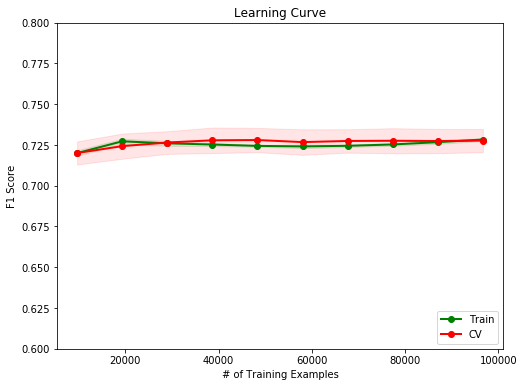

In [70]:
#Plot the Learning Curve
mean_train_scores = np.mean(train_scores, axis = 1)
std_train_scores = np.std(train_scores, axis = 1)
mean_cv_scores = np.mean(cv_scores, axis = 1)
std_cv_scores = np.std(cv_scores, axis = 1)

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(train_sizes_abs, mean_train_scores, 'o-', c = 'g', lw = 2, label = 'Train')
ax.plot(train_sizes_abs, mean_cv_scores, 'o-', c = 'r', lw = 2, label = 'CV')
ax.fill_between(train_sizes_abs, mean_train_scores + std_train_scores, mean_train_scores - std_train_scores, color = 'g', alpha = 0.1)
ax.fill_between(train_sizes_abs, mean_cv_scores + std_cv_scores, mean_cv_scores - std_cv_scores, color = 'r', alpha = 0.1)
ax.set_ylim(0.6, 0.8) #Note here that the ylim is between 0.6 and 0.8
ax.set_title('Learning Curve')
ax.set_xlabel('# of Training Examples')
ax.set_ylabel('F1 Score')
ax.legend(loc = 'lower right')
plt.show()

In [ ]:
#Training Scale
#Convergence issue
#Y limit